In [13]:
from sklearn.datasets import load_files
reviews_train = load_files('C:\\Users\\User\\Downloads\\aclImdb_v1\\aclImdb\\train\\')
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b'<br />', b' ') for doc in text_train]
reviews_test = load_files('C:\\Users\\User\\Downloads\\aclImdb_v1\\aclImdb\\train\\')
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [15]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)
document_topics = lda.fit_transform(X)

In [16]:
lda.components_.shape

(10, 10000)

In [17]:
import numpy as np
import mglearn
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        didn          girl          war           show          
dvd           nothing       kids          world         series        
game          actors        old           us            episode       
horror        book          guy           american      tv            
video         script        now           history       shows         
director      actually      going         against       episodes      
genre         thought       school        during        season        
quite         worst         want          years         television    
may           minutes       again         our           new           
work          read          years         german        now           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
funn

In [18]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=10, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [19]:
import numpy as np
import mglearn

topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
cagney        house         kevin         opera         role          town          action        
keaton        jackson       paris         soap          cast          small         fight         
role          haunted       kane          bugs          moore         horror        holmes        
star          dead          ford          duvall        performance   city          sequences     
james         mansion       citizen       sutherland    actor         sheriff       guys          
parker        bear          jay           phantom       funny         hammer        hero          
day           ghost         vegas         bunny         played        lake          cop           
hollywood     twin          shakespeare   midnight      khan          local         fighting      
buster    

In [20]:
import numpy as np

# Сортируем документы по весу темы "музыка" (индекс темы 45) по убыванию
music = np.argsort(document_topics100[:, 45])[::-1]

# Выводим первые два предложения из 10 самых релевантных документов для темы "музыка"
for i in music[:10]:
    print(b". ".join(text_train[i].split(b".")[:2]) + b".\n")

b'College students, who are clearing out a condemned dormitory, are stalked by an elusive killer.   The Dorm That Dripped Blood (aka Pranks) is a bit of a mixed bag for slasher fans.\n'
b'Good build up but this thriller is not always thrilling.  There is one good sequence that is tense, but it is hard to care about the characters.\n'
b'Well, it\'s an interesting premise, but the director misses most of the opportunities it offers, managing only a handful of suspenseful moments.  The film plays more like a whodunit than a horror film, but the "mystery" part is dreary, and the death scenes are silly and overwrought.\n'
b'This movie is great fun to watch if you love films of the organized crime variety.  Those looking for a crime film starring a charismatic lead with dreams of taking over in a bad way may be slightly disappointed with the way this film strides.\n'
b"Despite its interesting premise, 'Sniper' is quite tedious.  With a tighter script and sharper directing it could have been 

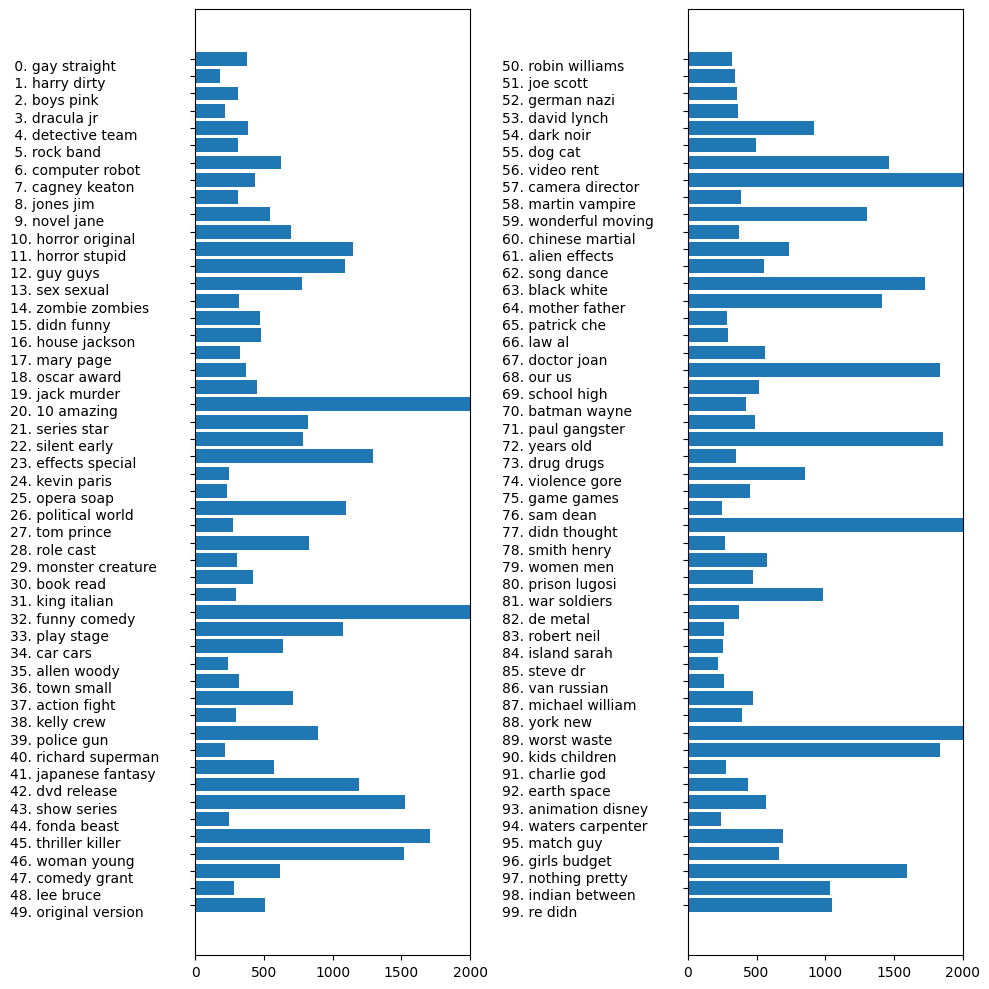

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ['{:>2}'.format(i) + '. ' + ' '.join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]

# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()